In [38]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import neurolab as nl
import numpy.random as rand
import pylab as pl
import ipywidgets as widgets
from IPython.display import display
from PIL import Image

Test neuroLab library:

Epoch: 20; Error: 41.55506854629956;
Epoch: 40; Error: 39.261410484840304;
Epoch: 60; Error: 39.50184891807287;
Epoch: 80; Error: 39.156365210841656;
Epoch: 100; Error: 38.913301249833665;
Epoch: 120; Error: 38.903042557117;
Epoch: 140; Error: 38.90444606170583;
Epoch: 160; Error: 38.91770967125623;
Epoch: 180; Error: 38.920437429675076;
Epoch: 200; Error: 38.91475708690048;
The maximum number of train epochs is reached


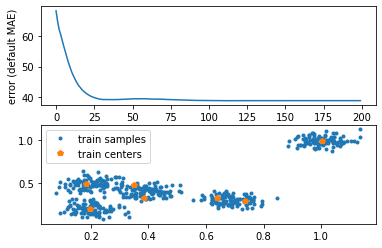

In [23]:
centr = np.array([[0.2, 0.2], [0.4, 0.4], [0.7, 0.3], [0.2, 0.5], [1, 1]])
rand_norm = 0.05 * rand.randn(100, 5, 2)
inp = np.array([centr + r for r in rand_norm])
inp.shape = (100 * 5, 2)
rand.shuffle(inp)

# Create net with 2 inputs and 4 neurons
net = nl.net.newc([[0.0, 1.0],[0.0, 1.0]], 7)
# train with rule: Conscience Winner Take All algoritm (CWTA)
error = net.train(inp, epochs=200, show=20)

# Plot results:
pl.title('Classification Problem')
pl.subplot(211)
pl.plot(error)
pl.xlabel('Epoch number')
pl.ylabel('error (default MAE)')
w = net.layers[0].np['w']

pl.subplot(212)
pl.plot(inp[:,0], inp[:,1], '.', \
        w[:,0], w[:,1], 'p')
pl.legend(['train samples', 'train centers'])
pl.show()

Test neuroLab on randomized 0-1 matrix images:

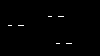

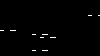

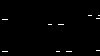

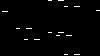

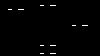

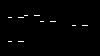

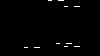

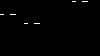

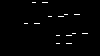

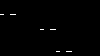

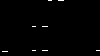

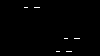

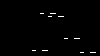

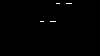

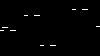

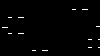

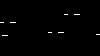

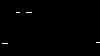

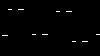

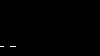

(20, 5600)


In [90]:
# create 20 0-1 images matrix
inputs = np.ones((20, 56*100))
for i in range(0, 20):
    arr = np.ones((56, 100))
    for j in range(0, 56):
        for h in range(0, 100):
            r = random.uniform(0, 1)
            arr[j][h] = 1 if r < 0.05 else 0
            inputs[i][j*100 + h] = arr[j][h]
    image = Image.fromarray(arr, mode="1")
    display(image)
print(inputs.shape)

In [94]:
# train CANN on the created data
nparr = np.zeros((5600, 2))
for i in range(0, 5600):
    nparr[i] = [0, 1]
# Create net with 2 inputs and 4 neurons
net = nl.net.newc(nparr, 15)
# train with rule: Conscience Winner Take All algoritm (CWTA)
error = net.train(inputs, epochs=400, show=20)
w = net.layers[0].np['w']
print(w)

Epoch: 20; Error: 3276.171793262504;
Epoch: 40; Error: 2927.7416217023883;
Epoch: 60; Error: 2809.20359746817;
Epoch: 80; Error: 2748.5551173776385;
Epoch: 100; Error: 2711.6049713099046;
Epoch: 120; Error: 2686.703885397008;
Epoch: 140; Error: 2668.7733743386484;
Epoch: 160; Error: 2655.2409270034786;
Epoch: 180; Error: 2644.6626612205782;
Epoch: 200; Error: 2636.165044987599;
Epoch: 220; Error: 2629.188375370385;
Epoch: 240; Error: 2623.357359422771;
Epoch: 260; Error: 2618.410894972836;
Epoch: 280; Error: 2614.161682690087;
Epoch: 300; Error: 2610.471855625199;
Epoch: 320; Error: 2607.2376717483685;
Epoch: 340; Error: 2604.3795654175156;
Epoch: 360; Error: 2601.8354889142793;
Epoch: 380; Error: 2599.5563405405246;
Epoch: 400; Error: 2597.502754055048;
The maximum number of train epochs is reached
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.  

Try widget:

In [61]:
my_dict = {'Image 1': 0.25, 'Image 2': 0.1, 'Image 3': 0.4, 'Image 4': 0.7}
def f(x):
    if x in my_dict.values():
        print(list(my_dict.keys())[list(my_dict.values()).index(x)])
    else:
        print("---")

In [25]:
widgets.interact(f, x=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5));

interactive(children=(FloatSlider(value=0.5, description='x', max=1.0, step=0.01), Output()), _dom_classes=('w…